# Лабораторная работа №2

Выполнено студентом группы 4117 Николаевым Дмитрием

 ## Цель работы

Изучение связи между признаками двумерного набора данных, визуализация данных.

## Индивидуальное задание

Вариант 2 <br> 
Информация о поездках в такси:
1. Дата и время начала 
2. Дата и время окончания 
3. Категория 
4. Место начала (можно не проверять данный столбец на наличие неявных дубликатов)
5. Место окончания (можно не проверять данный столбец на наличие неявных дубликатов)
6. Пройденные мили 
7. Цель поездки 

## Ход работы

Проведена предварительная обработку данных как в 1 лабораторной работе. <br>
Загружен датасет через библиотеку Python - pandos. Используем ';' для разделение данных.

In [1]:
import pandas
df = pandas.read_csv("drivers.csv", sep =';')

/home/tanuki/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


Затем было выведено на экран названия столбцов с помощью `df.columns`. 

In [2]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY*', 'START', 'STOP', 'MILES',
       'PURPOSEroute'],
      dtype='object')

Проблема заключается в том, что названия не имеют единого формата. Для этого столбцы были переименованы в едином формате.

In [3]:
df.columns = ['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES', 'PURPOSE_ROUTE']
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE_ROUTE'],
      dtype='object')

Также была проведена проверка на наличие пропусков, используя функцию `info()`.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   START_DATE     161 non-null    object 
 1   END_DATE       161 non-null    object 
 2   CATEGORY       161 non-null    object 
 3   START          161 non-null    object 
 4   STOP           161 non-null    object 
 5   MILES          161 non-null    float64
 6   PURPOSE_ROUTE  84 non-null     object 
dtypes: float64(1), object(6)
memory usage: 8.9+ KB


По данным видно, что пропуски есть только в столбце PURPOSE_ROUTE. С помощью метода `fillna()` пустые строки были заменены на 'Unknown'.

In [5]:
df['PURPOSE_ROUTE'].fillna('Unknown', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   START_DATE     161 non-null    object 
 1   END_DATE       161 non-null    object 
 2   CATEGORY       161 non-null    object 
 3   START          161 non-null    object 
 4   STOP           161 non-null    object 
 5   MILES          161 non-null    float64
 6   PURPOSE_ROUTE  161 non-null    object 
dtypes: float64(1), object(6)
memory usage: 8.9+ KB


После была получена таблица без пропусков.

Далее была проведена проверка на явные дубликаты.

In [6]:
df[df.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE_ROUTE
159,7.26.2016 22:31,7.26.2016 22:39,Business,Morrisville,Cary,45048.0,Meal/Entertain
160,7.26.2016 22:31,7.26.2016 22:39,Business,Morrisville,Cary,45048.0,Meal/Entertain


Видно что две строки идентичны, избавимся от них с помощью `drop_duplicates()`.

In [7]:
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE_ROUTE


Была проведена проверка на неявные дубликаты (различные написания одного и того же) при помощи функции `unique()` для столбцов с тектовым типом данных.
Для начала проверен столбец CATEGORY.

In [8]:
df['CATEGORY'].unique()

array(['Business', 'BUSINESS', 'Personal'], dtype=object)

Видно, что слово 'Business' пишется в двух вариациях. С помощью функции `replace()` данные были приведены к общему виду.

In [9]:
df['CATEGORY'] = df['CATEGORY'].replace('BUSINESS', 'Business')
df['CATEGORY'].unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   START_DATE     159 non-null    object 
 1   END_DATE       159 non-null    object 
 2   CATEGORY       159 non-null    object 
 3   START          159 non-null    object 
 4   STOP           159 non-null    object 
 5   MILES          159 non-null    float64
 6   PURPOSE_ROUTE  159 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.9+ KB


Тоже самое было проделано и для столбца PURPOSE_ROUTE, другие не были рассматрены, так как это или дата, или название.

In [10]:
df['PURPOSE_ROUTE'].unique()

array(['MEETING', 'Meal/Entertain', 'Meeting', 'Customer Visit',
       'Temporary Site', 'Unknown', 'Moving'], dtype=object)

In [11]:
df['PURPOSE_ROUTE'] = df['PURPOSE_ROUTE'].replace('MEETING', 'Meeting')
df['PURPOSE_ROUTE'].unique()

array(['Meeting', 'Meal/Entertain', 'Customer Visit', 'Temporary Site',
       'Unknown', 'Moving'], dtype=object)

Для удобства у столбцов с датой тип данных был изменен на `datetime`. 

In [12]:
df['START_DATE']    = pandas.to_datetime(df['START_DATE'],  format='%m.%d.%Y %H:%M')
df['END_DATE']      = pandas.to_datetime(df['END_DATE'],    format='%m.%d.%Y %H:%M')
df.dtypes

START_DATE       datetime64[ns]
END_DATE         datetime64[ns]
CATEGORY                 object
START                    object
STOP                     object
MILES                   float64
PURPOSE_ROUTE            object
dtype: object

Далее была проделана работа по визуализации данных.

Для начала была подключена библиотека `matplotlib` - одна из наиболее популярных библиотек для визуализации данных.<br>
В данной случае достаточно будет импортировать модуль `pyplot`, который содержит все необходимые компоненты для построения графиков. 

In [13]:
import matplotlib.pyplot as plt

Была построена диаграмма рассеивания (`scatter`), которая помогает обнаружить взаимосвязи между данными (например, определить связь роста и веса, связь стоимости жилья от площади и т.д.).

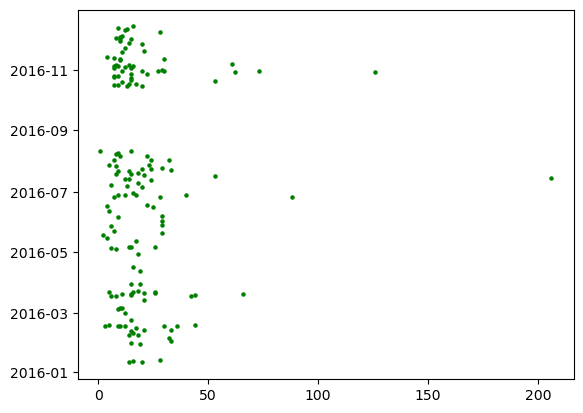

In [14]:
df["TIME_IN_ROAD"] = (df["END_DATE"] - df["START_DATE"]).dt.total_seconds() / 60
df["TIME_IN_ROAD"] = df["TIME_IN_ROAD"].round(2)
plt.scatter(df['TIME_IN_ROAD'], df['START_DATE'], s=5, color='green')

Для удобства был высчитан новый столбец - время в пути (TIME_IN_ROAD). С помощью данного столбца легче будет строить графики, которые в дальнейшем можно анализировать.<br>
Так был построен график, который показывает примерное распределение времени поездки по месяцам. Из него видно, что месяц года никак не влияет на длительность поездки.

Для дальнейшего анализа была построена матрица диаграмм рассеивания - диаграммы для нескольких признаков набора данных, которая отражает попарные взаимосвязи величин.


Для построения нескольких попарных двумерных распределений в наборе данных можно воспользоваться библиотекой `seaborn`, кототая содержит метод `pairplot()`.

Чтобы графики получались читабельные, были взяты значения где мили больше 40000, так как есть данные с милями до 100, которых не так много, но они портят вид графика.<br>
Данные графики были построены для места старта, места завершения и цели поездки.

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


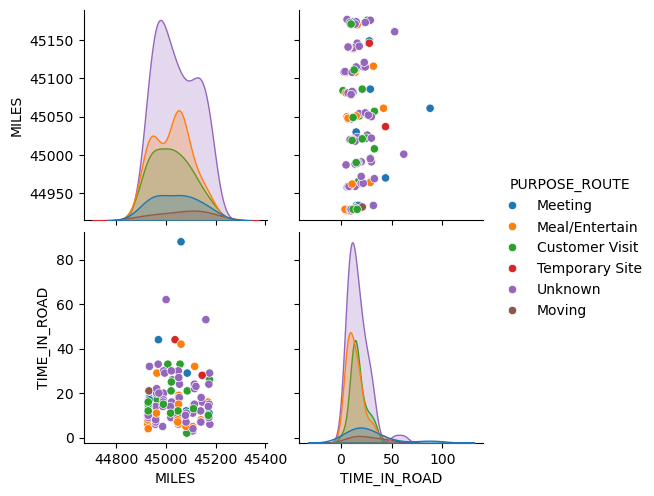

In [15]:
import seaborn as sns
fulter_df = df[df['MILES']>40000]
sns.pairplot(fulter_df[['MILES', 'PURPOSE_ROUTE','TIME_IN_ROAD']], hue = 'PURPOSE_ROUTE')

Данный график показывает зависимость цели поездки от количества миль и времени в пути.<br>
График демонстрирует, как разные цели поездки (например, встречи, развлечения или посещение клиентов) связаны с разными расстояниями и временем в пути.

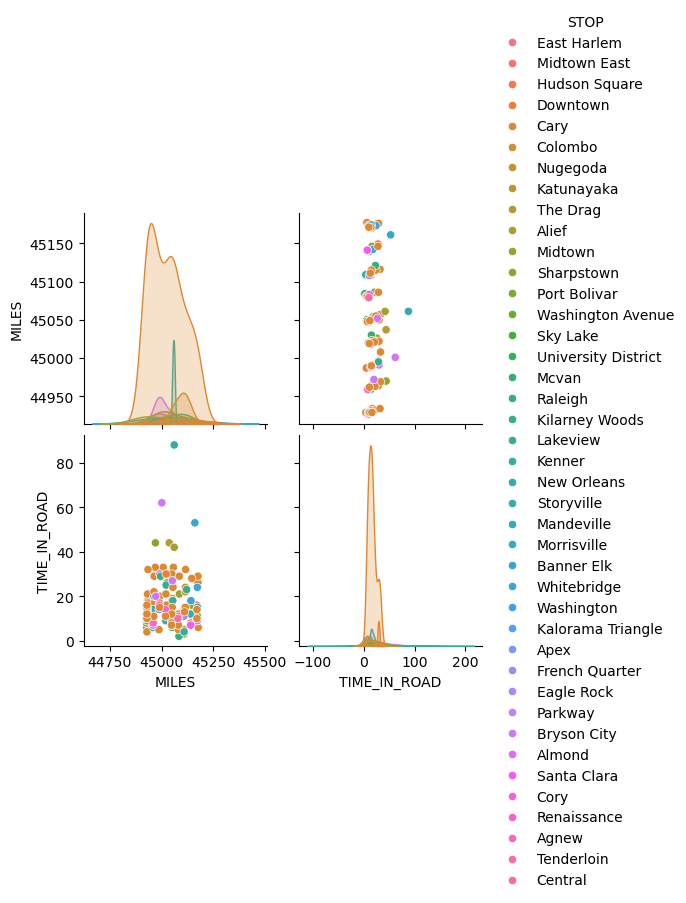

In [16]:
sns.pairplot(fulter_df[['MILES', 'STOP', 'TIME_IN_ROAD']], hue = 'STOP')

Данный график позволяет визуализировать зависимость между местом старта поездки, количеством миль и временем в пути. <br>
График демонстрирует, как разные места старта (например, Midtown, Central, Apex и др.) связаны с различными расстояниями и временем в пути, что позволяет определить какие места являются наиболее популярными точками начала поездок и позволяет увидеть, как расстояние до места старта влияет на длительность поездки.

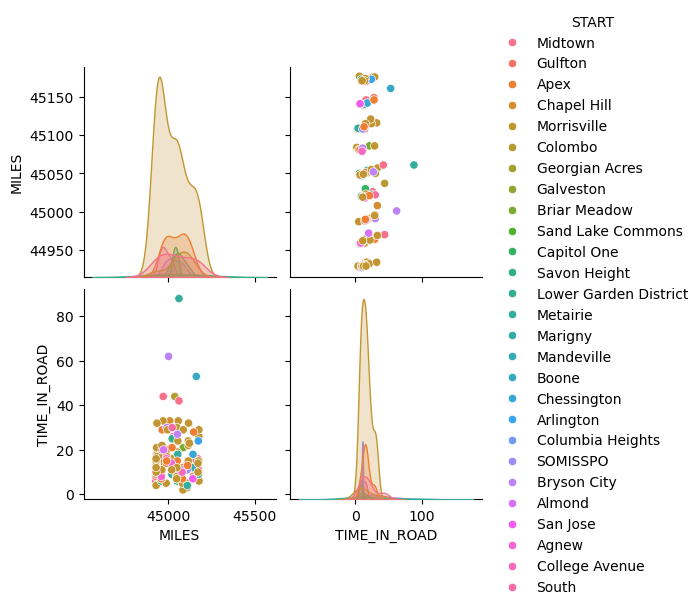

In [17]:
sns.pairplot(fulter_df[['MILES', 'START','TIME_IN_ROAD']], hue = 'START')

Данный график позволяет тоже самое, что и предыдущий, но с точки зрения конца, а не начала поездки.

Далее было проведено исследование взаимосвязи между переменными с помощью оценки коэффициента корреляции и ковариации. <br>
Корреляция – это статистическая мера зависимости между двумя переменными. Она позволяет определить, насколько две переменные изменяются вместе.<br>
Ковариация - это статистическая мера, которая измеряет степень изменения двух переменных вместе. Она описывает направление и силу взаимосвязи между двумя переменными. <br>

Корреляция может быть измерена с помощью коэффициента корреляции, такого как коэффициент Пирсона. Коэффициент Пирсона находят с помощью метода `corr()`.

In [18]:
df2 = df[['MILES', 'START_DATE', 'END_DATE', 'TIME_IN_ROAD']]
df2.corr()

,MILES,START_DATE,END_DATE,TIME_IN_ROAD
MILES,1.000000,-0.078201,-0.078244,-0.298008
START_DATE,-0.078201,1.000000,1.000000,-0.000379
END_DATE,-0.078244,1.000000,1.000000,-0.000234
TIME_IN_ROAD,-0.298008,-0.000379,-0.000234,1.000000


Также можно вычислить коэффициент корреляции между двумя конкретными столбцами.

In [19]:
df2['TIME_IN_ROAD'].corr(df2['MILES'])

-0.29800758591382426

Так как корреляция отрицательна, то изменение количества миль ведет к обратному изменению времени в пути. То есть при увеличении длинны поездки, время поездки уменьшается, что не логично. <br>
Достоверности в том, что здесь есть причинно-следственная связь, нет. Информации от всей таблицы корреляции недостаточно, чтобы дать ответ. <br>
Однако, если проанализировать некоторые данные, то видно, что кто-то проезжал 46000 миль за 15 минут, а кто-то 2 мили за 17.s

Для расчета ковариации используется функция `cov()` библиотеки `numpy`.

In [20]:
import numpy as np
data = np.array([df['TIME_IN_ROAD'], df['MILES']])
cov = np.cov(data, bias=True)
print(cov)

[[ 4.72794589e+02 -1.07868558e+05]
 [-1.07868558e+05  2.77116644e+08]]


Ковариация между `TIME_IN_ROAD` и `MILES`: Отрицательное значение (-1.07868558 × 10^5) указывает на обратную зависимость между временем в пути и количеством миль. Это значит, что, вероятно, чем больше времени в пути, тем меньше пройденное расстояние, и наоборот. Однако, значение ковариации не нормализовано, поэтому нельзя точно сказать, насколько сильна эта зависимость.

Также был была построена тепловая карта корреляции (`heatmap`). Матрица оформляется в цветовой палитре, так ярикие цвета - положительные коэффициенты, а темные - отрицательные. <br>
`imshow` позволяет создавать двумерные картинки, используя цветовую карту `summer`. Для наименования столбцов и строк использовальсь методы `xticks` и `yticks`.

([<matplotlib.axis.YTick at 0x7f3ae561c5e0>,
 [Text(0, 0, 'MILES'), Text(0, 1, 'TIME_IN_ROAD')])

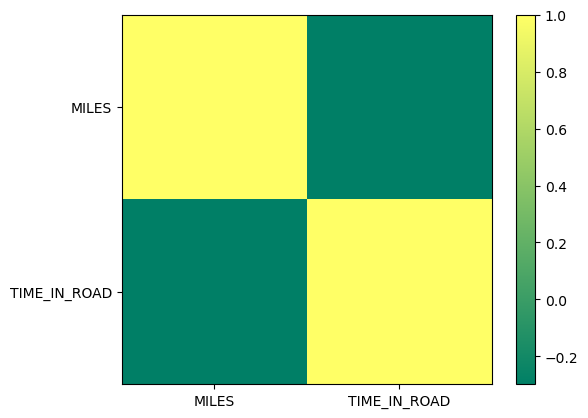

In [21]:
df3 = df[['MILES', 'TIME_IN_ROAD']]
corr = df3.corr()
plt.imshow(corr, cmap='summer')
plt.colorbar()
plt.xticks(range(len(corr.columns)),
           corr.columns)
plt.yticks(range(len(corr.columns)),
           corr.columns)

По данному графику можно сказать, что чем больше количество миль, тем меньше время поездки.

## Индивидуальное задание

Задание 1: Использовать seaborn. По группировке - CATEGORY и количество поездок каждого типа (по цели маршрута - PURPOSE) отфильтровать данные группировки по количеству поездок больше 2 и построить диаграмму.

Для начала была проведена группировка данных функцией `groupby`, а с помощью `size` считает кол-во вхождений. <br>
Далее создается таблица с фильтрацией количества вхождений больше двух. <br>
Функция `barplot` строит столбчатую диаграмму, где по оси X отображаются различные цели маршрута (PURPOSE_ROUTE), по оси Y отображается количество поездок, а цвет столбцов указывает на категорию (CATEGORY).

Text(0, 0.5, 'Количество поездок')

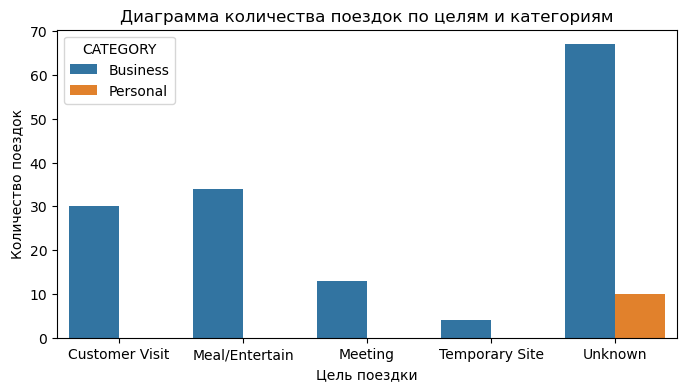

In [22]:
grouped_data = df.groupby(['CATEGORY', 'PURPOSE_ROUTE']).size().reset_index(name='count')
filtered_data = grouped_data[grouped_data['count'] > 2]

plt.subplots(figsize=(8, 4))

sns.barplot(x='PURPOSE_ROUTE', 
            y='count', 
            hue='CATEGORY', 
            data=filtered_data
)
plt.title('Диаграмма количества поездок по целям и категориям')
plt.xlabel(xlabel = 'Цель поездки')
plt.ylabel(ylabel = 'Количество поездок')

Этот график позволяет наглядно сравнить количество поездок для различных целей маршрута в разных категориях. Визуализация данных в виде столбчатой диаграммы делает анализ более понятным и удобным для интерпретации.

Задание 2: Использовать pandas и plot. По сводной таблице (pivot_table) - отобразить среднее количество пройденных миль по каждой цели поездки (PURPOSE). Оставить только маркеры в виде ★ зеленого цвета размеров 18.

Сначала создаем сводную таблицу функцией `pivot_table`, с сркдним значением `MILES`, которые группируются по `PURPOSE_ROUTE`. <br>
Затем строим график по условию, звездочку рисуем символом - '*', а размер указываем 180. Сетку же добавляем при помощи `grid()`,

Text(0.5, 1.0, 'График среднего количество пройденных миль по каждой цели поездки')

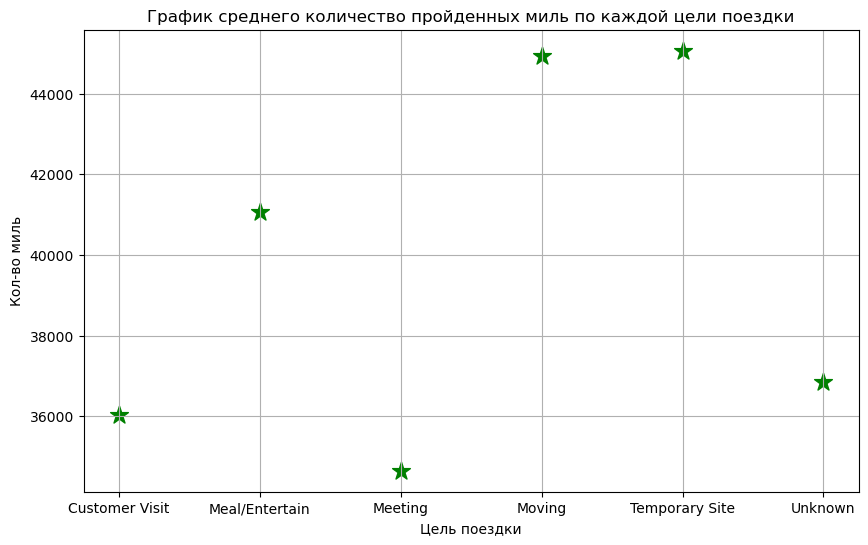

In [23]:
pivot_table = pandas.pivot_table(df, values='MILES', index='PURPOSE_ROUTE', aggfunc='mean')
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.scatter(
        pivot_table.index,
        pivot_table['MILES'],
        marker='*',
        color='green',
        s=180
)
plt.xlabel('Цель поездки')
plt.ylabel('Кол-во миль')
plt.title('График среднего количество пройденных миль по каждой цели поездки')


Этот график позволяет визуализировать и сравнить средние расстояния, пройденные для различных целей поездки. Зеленые звезды на графике представляют каждую уникальную цель поездки, и их вертикальное положение отражает среднее количество миль для каждой цели. Такой график позволяет быстро определить различия в пройденных расстояниях между разными целями поездки.

Задание 3: Использовать matplotlib. Построить круговую диаграмму, которая отображает процент по каждой цели поездки. Уберите из диаграммы количество поездок меньше 5.

Создаем сводную таблицу и фильтруем ее значения аналогичка предыдущим заданиям. <br>
Далее строим круговую диаграмму, у которой указываем формат отображения процентов.

Text(0.5, 1.0, 'Распределение целей поездки')

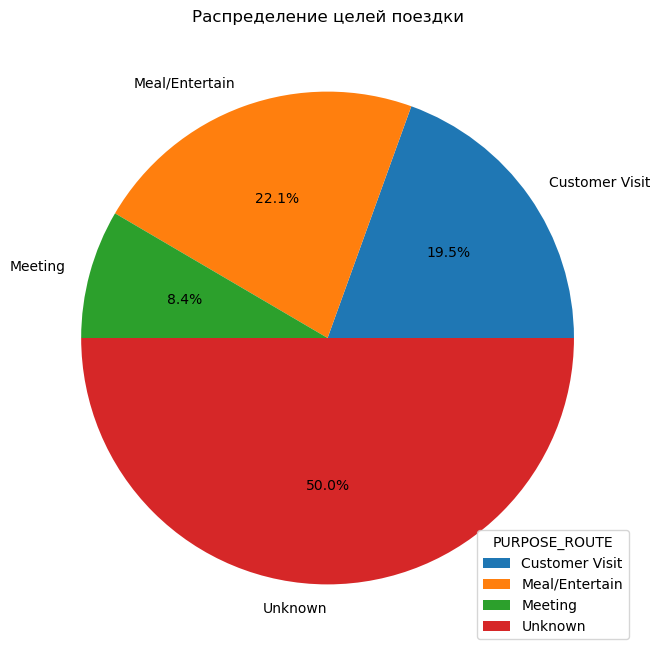

In [24]:
pivot_table = pandas.pivot_table(df, values='MILES', index='PURPOSE_ROUTE', aggfunc='count')
filtered_pivot_table = pivot_table[pivot_table['MILES'] >= 5]
plt.figure(figsize=(8, 8))
plt.pie(
    filtered_pivot_table['MILES'], 
    labels=filtered_pivot_table.index, 
    autopct='%1.1f%%'
)
plt.legend(title='PURPOSE_ROUTE', loc='lower right')
plt.title('Распределение целей поездки')

Этот график позволяет визуализировать процентное распределение целей поездки для категорий, где количество поездок составляет 5 и более. Круговая диаграмма наглядно показывает, какие цели поездки являются более распространенными среди данных с учетом заданного условия (поездки >= 5).

## Вывод

В ходе исследования данных я научился использовать различные библиотеки Python для визуализации и анализа данных. Я освоил создание графиков, включая столбчатые, круговые и точечные диаграммы, а также работу с различными аспектами графического представления данных, включая добавление аннотаций, легенд и цветовых схем. Также я освоил работу с таблицами и сводными таблицами, фильтрацию данных и применение различных агрегирующих функций.<br>
Это позволяет мне создавать информативные визуализации данных и проводить анализ данных, выявляя закономерности и взаимосвязи в больших объемах информации. Полученные навыки помогут мне более эффективно и наглядно представлять данные в будущем, делая их доступными и понятными для аудитории.